(1000, 2)
(1000, 1)


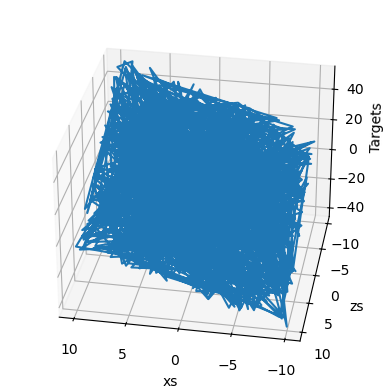

[[0.0251552 ]
 [0.00377164]]
[0.02780171]
220.07660138734252
37.303780273547716
14.832803574736387
11.718210920381908
10.955765399946353
10.49257671427251
10.080196605242012
9.688043075433775
9.311865492858555
8.950615459174795
8.603652529256696
8.270405850843112
7.950332486565165
7.642911607606428
7.347643051556781
7.0640464368191385
6.791660372380533
6.530041706113587
6.278764803673827
6.037420856008552
5.805617214252692
5.582976750917757
5.369137246333086
5.163750799341077
4.966483261287564
4.777013692386514
4.595033839574584
4.420247635006046
4.25237071437216
4.091129954261338
3.936263027807442
3.7875179779032315
3.6446528072846824
3.5074350848192215
3.375641567357354
3.2490578365324745
3.127477949917927
3.010704105973831
2.898546322238504
2.790822126240959
2.687356258631609
2.5879803880481864
2.4925328372529774
2.40085832009586
2.312807688875131
2.228237691685165
2.1470107393560944
2.0689946816063363
1.9940625920438046
1.9220925616659905
1.8529675005229809
1.7865749472207149
1.722

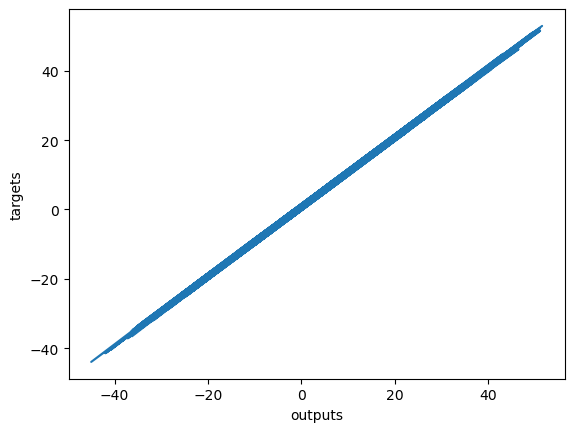

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, high=10, size=(observations,1))

inputs = np.column_stack((xs, zs))
print(inputs.shape)

noise = np.random.uniform(-1, 1, size=(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

# Make shapes compatible for 3D plot
xs_plot = xs.reshape(-1)
zs_plot = zs.reshape(-1)
targets_plot = targets.reshape(-1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs_plot, zs_plot, targets_plot)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)

plt.show()

# Prepare for training
targets = targets.reshape(observations,1)

init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print(weights)
print(biases)

learning_rate = 0.02

for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / (2 * observations)
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

print(weights, biases)

plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
